<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers

In [25]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


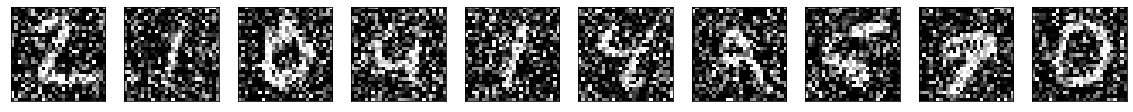

In [26]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
try:
    autoencoders.load_weights("weights.h5")
except:
    pass

In [33]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0970 - val_loss: 0.0964
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0968 - val_loss: 0.0962
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0964 - val_loss: 0.0958
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0961 - val_loss: 0.0957
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0959 - val_loss: 0.0953
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0957 - val_loss: 0.0952
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0955 - val_loss: 0.0950
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0953 - val_loss: 0.0948
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0952 - val_loss: 0.0947
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0950 - val_loss: 0.0946

In [34]:
autoencoder.save_weights("weights.h5")

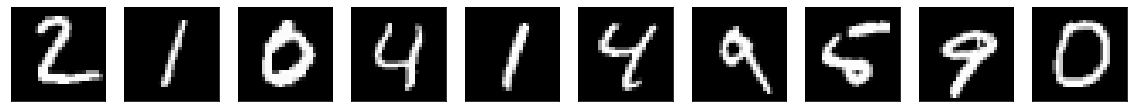

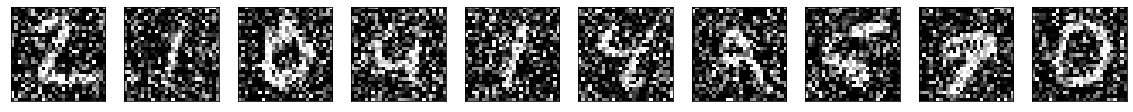

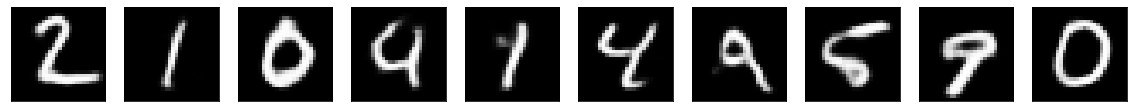

In [35]:
p=autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

autoencoder = keras.models.Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

Epoch 1/10
59/59 [==============================] - 6s 108ms/step - loss: 0.0756 - val_loss: 0.0497
Epoch 2/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0430 - val_loss: 0.0372
Epoch 3/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0340 - val_loss: 0.0299
Epoch 4/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0283 - val_loss: 0.0261
Epoch 5/10
59/59 [==============================] - 6s 105ms/step - loss: 0.0256 - val_loss: 0.0241
Epoch 6/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0239 - val_loss: 0.0227
Epoch 7/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 8/10
59/59 [==============================] - 6s 106ms/step - loss: 0.0216 - val_loss: 0.0207
Epoch 9/10
59/59 [==============================] - 6s 107ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 10/10
59/59 [==============================] - 6s 107ms/step - loss: 0.0200 - val_loss: 0.0192